## Importando as dependências do projeto

In [2]:
import pandas as pd
import numpy as np

## Definir a minha base de dados

In [3]:
dados = {
    'Região': ['Norte', 'Norte', 'Sul', 'Sul', 'Norte'],
    'Mês': ['Jan', 'Fev', 'Jan', 'Fev', 'Mar'],
    'Vendas': [1500, np.nan, 2200, 1800, 2000],
    'Despesas': [300, 250, np.nan, 400, 350]
}

## Criar DataFrame chamado "sales"

In [42]:
sales = pd.DataFrame(dados)

## Exportar para Excel

In [ ]:
sales.to_excel('datasets/dados_vendas.xlsx', index=False)

## Leitura e análise dos dados 

In [45]:
sales = pd.read_excel('datasets/dados_vendas.xlsx')

In [46]:
sales

,Região,Mês,Vendas,Despesas
0,Norte,Jan,1500.0,300.0
1,Norte,Fev,NaN,250.0
2,Sul,Jan,2200.0,NaN
3,Sul,Fev,1800.0,400.0
4,Norte,Mar,2000.0,350.0


## Verificar se há valores nulos

In [47]:
print(sales.isna())

   Região    Mês  Vendas  Despesas
0   False  False   False     False
1   False  False    True     False
2   False  False   False      True
3   False  False   False     False
4   False  False   False     False


## Exemplos de tratamento: 



**Tratamento 1** - Preencher nulos com 0

In [ ]:
sales.fillna(0, inplace=True)

In [37]:
sales

,Região,Mês,Vendas,Despesas
0,Norte,Jan,1500.0,300.0
1,Norte,Fev,0.0,250.0
2,Sul,Jan,2200.0,0.0
3,Sul,Fev,1800.0,400.0
4,Norte,Mar,2000.0,350.0


**Tratamento 2** - Preencher nulos com a média ou mediana da coluna (o mais recomendado)

Preenchendo valor nulo da coluna "Vendas" com a mediana da coluna.

In [49]:
sales['Vendas'] = sales['Vendas'].fillna(sales['Vendas'].median())

In [50]:
sales

,Região,Mês,Vendas,Despesas
0,Norte,Jan,1500.0,300.0
1,Norte,Fev,1900.0,250.0
2,Sul,Jan,2200.0,NaN
3,Sul,Fev,1800.0,400.0
4,Norte,Mar,2000.0,350.0


Preenchendo valor nulo da coluna "Despesas" com a média da coluna.

In [51]:
sales['Despesas'] = sales['Despesas'].fillna(sales['Despesas'].mean())

In [52]:
sales

,Região,Mês,Vendas,Despesas
0,Norte,Jan,1500.0,300.0
1,Norte,Fev,1900.0,250.0
2,Sul,Jan,2200.0,325.0
3,Sul,Fev,1800.0,400.0
4,Norte,Mar,2000.0,350.0


In [74]:
print(sales)

  Região  Mês  Vendas  Despesas
0  Norte  Jan  1500.0     300.0
1  Norte  Fev  1900.0     250.0
2    Sul  Jan  2200.0     325.0
3    Sul  Fev  1800.0     400.0
4  Norte  Mar  2000.0     350.0


## Agrupar os dados por "Região" e "Mês" e calcular a soma total das vendas e média das despesas.

In [55]:
salesgrouped = sales.groupby(['Região', 'Mês']).agg({
    'Vendas': 'sum',       # Soma total de vendas
    'Despesas': 'mean'     # Média das despesas
}).reset_index()

**OBS.**: Na minha tabela não há valores repetidos para as colunas de Região e Mês. 

Se houvesse, 

- O groupby(['Região', 'Mês']) iria juntar as linhas que têm os mesmos valores de Região e Mês;

- A função .agg() aplicaria funções de agregação a cada grupo:

'Vendas': 'sum' soma todos os valores de vendas do grupo 'Vendas'.

'Despesas': 'mean' tira a média dos valores de despesas do grupo 'Despesas'.

In [73]:
salesgrouped

,Região,Mês,Vendas,Despesas
0,Norte,Fev,1900.0,250.0
1,Norte,Jan,1500.0,300.0
2,Norte,Mar,2000.0,350.0
3,Sul,Fev,1800.0,400.0
4,Sul,Jan,2200.0,325.0


In [72]:
print(salesgrouped)

  Região  Mês  Vendas  Despesas
0  Norte  Fev  1900.0     250.0
1  Norte  Jan  1500.0     300.0
2  Norte  Mar  2000.0     350.0
3    Sul  Fev  1800.0     400.0
4    Sul  Jan  2200.0     325.0


## Combinar horizontalmente (hstack) as colunas "Vendas" e "Despesas" após substituição.

hstack exige array 2D, então é necessário utilizar reshape

In [ ]:
vendas_array = sales['Vendas'].values.reshape(-1, 1)
despesas_array = sales['Despesas'].values.reshape(-1, 1)

Combinar horizontalmente

In [59]:
combinado = np.hstack([vendas_array, despesas_array])

In [70]:
print(combinado)

[[1500.  300.]
 [1900.  250.]
 [2200.  325.]
 [1800.  400.]
 [2000.  350.]]


##  Gerar um sumário estatístico (média, mediana, desvio padrão) para todas as colunas numéricas (dados contínuos).

Selecionar apenas as colunas numéricas

In [64]:
cols_numericas = sales.select_dtypes(include='number')


Criar um novo dataframe com o meu sumário desejado

In [65]:
sumario_estatistico = pd.DataFrame({
    'Média': cols_numericas.mean(),
    'Mediana': cols_numericas.median(),
    'Desvio Padrão': cols_numericas.std()
})

In [69]:
print(sumario_estatistico)

           Média  Mediana  Desvio Padrão
Vendas    1880.0   1900.0     258.843582
Despesas   325.0    325.0      55.901699


## Visualização dos dados através de gráficos

In [76]:
import matplotlib.pyplot as plt

Gráfico de barras (agrupado por estatística):


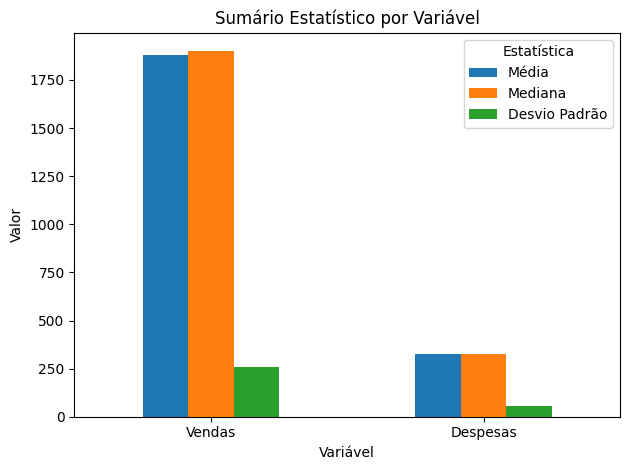

In [78]:
sumario_estatistico.plot(kind='bar')
plt.title('Sumário Estatístico por Variável')
plt.ylabel('Valor')
plt.xlabel('Variável')
plt.legend(title='Estatística')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Gráfico de barras transposto (agrupado por coluna):

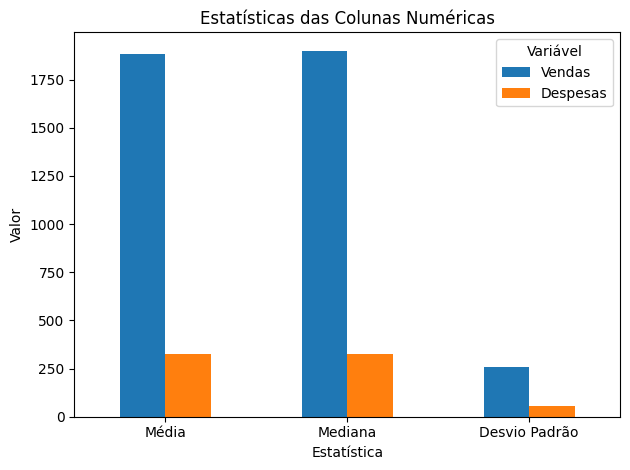

In [79]:
sumario_estatistico.T.plot(kind='bar')
plt.title('Estatísticas das Colunas Numéricas')
plt.ylabel('Valor')
plt.xlabel('Estatística')
plt.legend(title='Variável')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
with pd.ExcelWriter('datasets/dados_vendas_analise.xlsx') as writer:
    sales.to_excel(writer, sheet_name='Dados Tratados', index=False)
    salesgrouped.to_excel(writer, sheet_name='Dados Agrupados', index=False)
    sumario_estatistico.to_excel(writer, sheet_name='Sumário Estatístico')